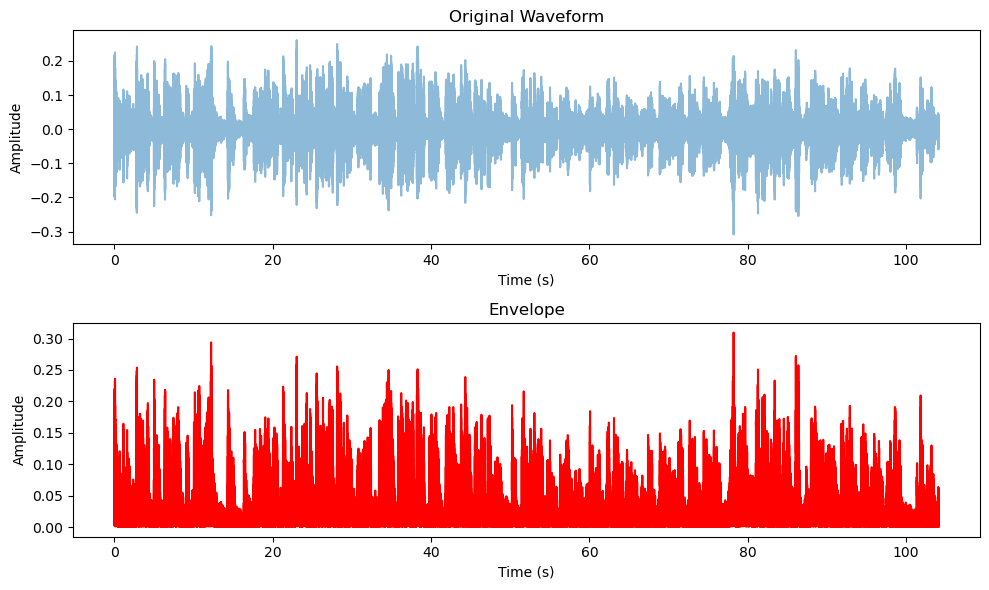

In [15]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, filtfilt

audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

analytic_signal = hilbert(y)

envelope = np.abs(analytic_signal)

time = np.arange(0, len(y)) / sr

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, y, alpha=0.5)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, envelope, color='red')
plt.title('Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

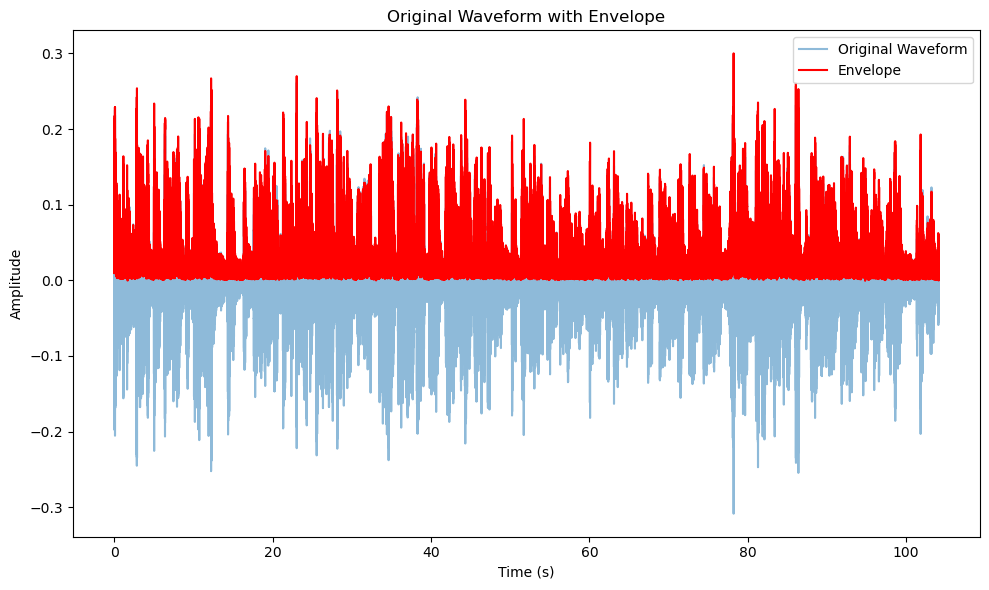

In [19]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

# Load the audio file
audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

# Calculate the analytic signal using the Hilbert transform
analytic_signal = hilbert(y)

# Calculate the envelope as the magnitude of the analytic signal
envelope = np.abs(analytic_signal)

# Set up a low-pass Butterworth filter
order = 5  # Filter order
cutoff_frequency = 1000  # Adjust cutoff frequency as needed
b, a = butter(order, cutoff_frequency, 'low', fs=sr)

# Apply the filter using filtfilt
smoothed_envelope = filtfilt(b, a, envelope)

# Create a time array
time = np.arange(0, len(y)) / sr

# Plot the original waveform
plt.figure(figsize=(10, 6))
plt.plot(time, y, alpha=0.5, label='Original Waveform')

# Plot the smoothed envelope over the waveform as a line curve
plt.plot(time, smoothed_envelope, color='red', label='Envelope')

plt.title('Original Waveform with Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()  # Show legend

plt.tight_layout()
plt.show()



22050


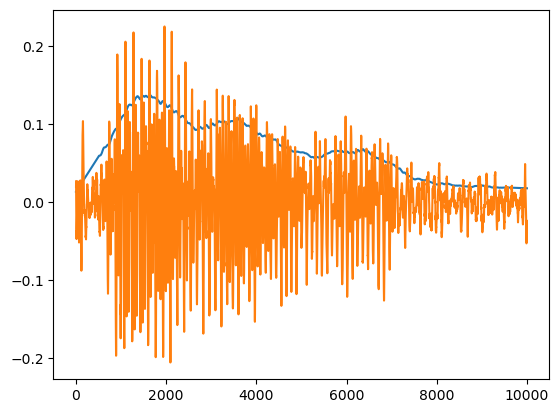

In [43]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, butter, filtfilt, find_peaks, savgol_filter
from scipy.interpolate import interp1d

# Load the audio file
audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

print(sr)

# Calculate the analytic signal using the Hilbert transform
analytic_signal = hilbert(y)

env = np.abs(analytic_signal[:10000])

env = savgol_filter(env, 1000, 1)
plt.plot(env)
plt.plot(y[:10000])

In [59]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for audio recording
duration = 10  # Duration of audio recording in seconds
sample_rate = 22050  # Sample rate in Hz

# Function to handle audio input stream
def audio_callback(indata, frames, time, status):
    if status:
        print('Error:', status)
    # Plot the waveform
    # plt.clf()
    # plt.plot(np.arange(len(indata)) / sample_rate, indata)
    # plt.title('Live Audio Waveform')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.ylim(-1, 1)  # Adjust the y-axis limits if necessary
    # plt.pause(0.001)  # Pause for a short time to update the plot
    print(indata)

# Start the audio stream
with sd.InputStream(callback=audio_callback,
                     samplerate=sample_rate,
                     channels=1):
    sd.sleep(int(duration * 1000))

[[-2.3446081e-02]
 [-3.3005670e-02]
 [-2.3776039e-02]
 [-1.5087223e-02]
 [-5.9516081e-03]
 [ 2.6913527e-03]
 [ 1.1144288e-02]
 [ 1.2459716e-02]
 [ 1.5716473e-02]
 [ 1.6455103e-02]
 [ 1.2091851e-02]
 [ 5.2817608e-03]
 [-3.8891973e-05]
 [-4.8815706e-03]]
[[-0.0099304 ]
 [-0.00984175]
 [-0.01176149]
 [-0.01492279]
 [-0.01344472]
 [-0.01045957]
 [-0.00826894]
 [-0.00424176]
 [ 0.00183095]
 [ 0.00547545]
 [ 0.00882185]
 [ 0.01229119]
 [ 0.01102354]
 [ 0.00711559]]
[[ 0.00251472]
 [-0.00624401]
 [-0.01382558]
 [-0.02135164]
 [-0.0304841 ]
 [-0.03693075]
 [-0.04060405]
 [-0.04132973]
 [-0.03852846]
 [-0.03514811]
 [-0.02804187]
 [-0.01776111]
 [-0.00333734]
 [ 0.01173541]]
[[-0.00069592]
 [-0.01233564]
 [-0.01330426]
 [-0.01264461]
 [-0.00026716]
 [ 0.00710224]
 [ 0.01707376]
 [ 0.02495201]
 [ 0.03171917]
 [ 0.03760092]
 [ 0.04492458]
 [ 0.04703748]
 [ 0.04477382]
 [ 0.0416453 ]]
[[ 0.00854902]
 [-0.00912405]
 [-0.00899054]
 [-0.01169221]
 [-0.00838826]
 [-0.01027287]
 [-0.00901755]
 [-0.0078